In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [2]:
customer_profiles_df=pd.read_csv("./data/customer_profiles_table.csv")
transactions_df=pd.read_csv("./data/transactions_df.csv")
terminal_profiles_df=pd.read_csv("./data/terminal_profiles_table.csv")

# Introduction

This project will use a data set generator created by [Yann-Aël Le Borgne & Gianluca Bontempi](https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html). The generator will create three dataset that reproduce the logs of a fictional card company, including fraudulent transactions by fraudsters. 

The logs are split in three dataset, column name in lower case are directly linked to the main dataset **transactions_df**:

1 - Customer profile

| Column | Type | Description |
| --- | --- | --- |
| CUSTOMER_ID | int64 | The customer unique ID|
|(x_customer_id,y_customer_id) | float64 | A pair of real coordinates (x_customer_id,y_customer_id) in a 100 * 100 grid, that defines the geographical location of the customer |
|(mean_amount, std_amount) | float64 | The mean and standard deviation of the transaction amounts for the customer, assuming that the transaction amounts follow a normal distribution. The mean_amount will be drawn from a uniform distribution (5,100) and the std_amount will be set as the mean_amount divided by two.|
| mean_nb_tx_per_day | float64 | The average number of transactions per day for the customer, assuming that the number of transactions per day follows a Poisson distribution. This number will be drawn from a uniform distribution (0,4) |

The generate_customer_profiles_table function provides an implementation for generating a table of customer profiles. It takes as input the number of customers for which to generate a profile and a random state for reproducibility. It returns a DataFrame containing the properties for each customer.

In [3]:
customer_profiles_df.dtypes

CUSTOMER_ID              int64
x_customer_id          float64
y_customer_id          float64
mean_amount            float64
std_amount             float64
mean_nb_tx_per_day     float64
available_terminals     object
nb_terminals             int64
dtype: object

In [4]:
customer_profiles_df.head()

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[29, 87, 144, 241, 330, 858, 996]",7
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",12
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[316, 406, 447, 523, 968]",5
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[65, 94, 113, 364, 401, 433, 485, 651, 672, 77...",14
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[372, 614, 774]",3


In [5]:
customer_profiles_df.shape

(5000, 8)

In [6]:
# voir a quoi correspond 
customer_profiles_df[(customer_profiles_df.nb_terminals == 0)]

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
253,253,28.754450,45.670363,6.990257,3.495128,1.646462,[],0
463,463,28.477971,44.462536,93.362004,46.681002,0.725071,[],0
753,753,30.796569,42.946659,34.939393,17.469696,0.280694,[],0
2317,2317,32.724566,47.369004,77.806120,38.903060,3.648378,[],0
2603,2603,33.080235,45.477915,9.215846,4.607923,1.691756,[],0
2680,2680,29.990536,46.595376,32.742513,16.371256,3.948059,[],0
3165,3165,29.822080,44.463214,53.313655,26.656828,0.021064,[],0
3327,3327,31.197729,43.710671,63.108854,31.554427,1.991953,[],0
3519,3519,30.978290,44.089483,22.673898,11.336949,0.701780,[],0
4442,4442,29.804059,47.386636,46.150710,23.075355,2.949007,[],0


In [7]:
transactions_df[(transactions_df.CUSTOMER_ID == 253)]

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO


In [8]:
customer_profiles_df.describe()

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2499.500000,49.626386,50.013166,51.797573,25.898787,1.977582,7.51520
std,1443.520003,28.991158,29.081224,27.779156,13.889578,1.154736,3.00406
min,0.000000,0.007245,0.020695,5.032382,2.516191,0.000295,0.00000
25%,1249.750000,24.417225,24.808494,27.885592,13.942796,0.977653,5.00000
50%,2499.500000,49.462662,50.073791,51.681424,25.840712,1.952286,7.00000
75%,3749.250000,74.615700,75.910068,75.633210,37.816605,2.996354,9.00000
max,4999.000000,99.996202,99.996402,99.981815,49.990907,3.999912,19.00000


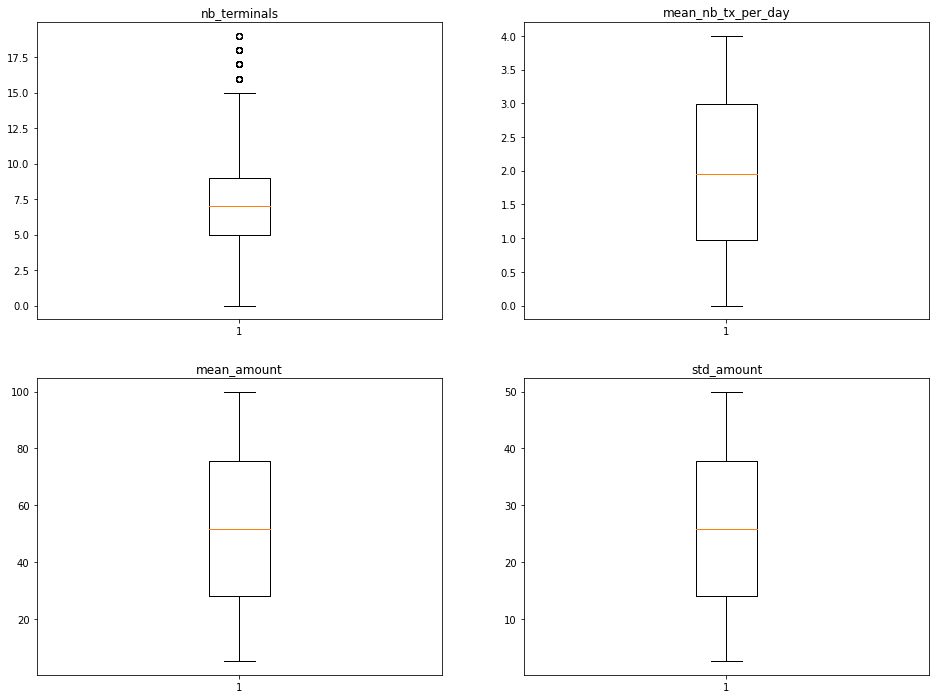

In [9]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

ax[0][0].boxplot(customer_profiles_df["nb_terminals"])
ax[1][0].boxplot(customer_profiles_df["mean_amount"])
ax[0][1].boxplot(customer_profiles_df["mean_nb_tx_per_day"])
ax[1][1].boxplot(customer_profiles_df["std_amount"])

ax[0][0].title.set_text("nb_terminals")
ax[1][0].title.set_text("mean_amount")
ax[0][1].title.set_text("mean_nb_tx_per_day")
ax[1][1].title.set_text("std_amount")


plt.show()


2 - Transaction list

| Column | Type | Description |
| --- | --- | --- |
| TRANSACTION_ID  | int64 | The transaction ID|
| TX_DATETIME  | object | The timestamp of the transaction|
| CUSTOMER_ID  | int64 | Customer ID, linked to the customer dataset|
| TX_FRAUD  | int64 | Boolean condition, marking the transaction as fraudulent or not|
| TX_FRAUD_SCENARIO | int64 | Referencing the fraud scenario, 0 indicate a genuine transaction|

In [10]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,298,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,441,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,316,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,370,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,415,50.99,634,0,0,0


In [11]:
transactions_df.shape

(1750048, 9)

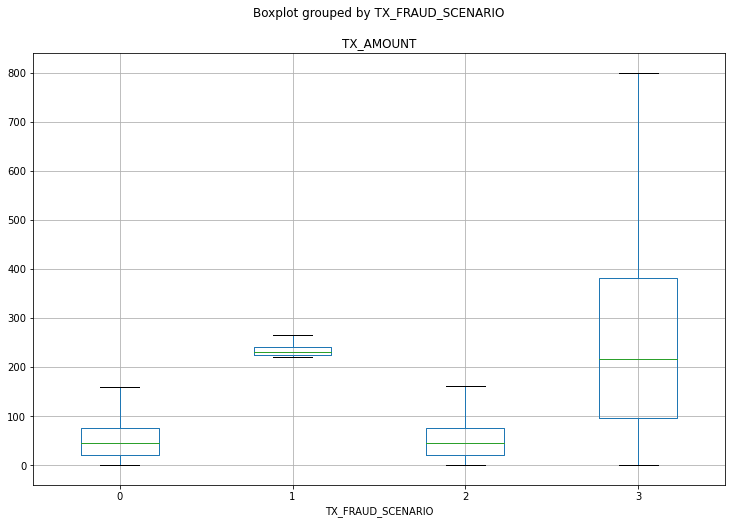

In [13]:
transactions_df.boxplot("TX_AMOUNT", by = "TX_FRAUD_SCENARIO",showfliers=False, figsize=(12,8));

In [49]:
sce_0.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,298,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,441,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,316,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,370,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,415,50.99,634,0,0,0


In [150]:
genuine = transactions_df[transactions_df.TX_FRAUD_SCENARIO == 0]
genuine = genuine.groupby(by = "TX_TIME_DAYS").sum()

fraud = transactions_df[(transactions_df.TX_FRAUD_SCENARIO != 0)]
                       
fraud = fraud.groupby(by = "TX_TIME_DAYS").sum()

genuine_max = genuine.index.max() +1

In [152]:
days = []
for i in range (0, genuine_max):
    days.append(i)
    
genuine_data = []
for i in genuine.TX_AMOUNT:
    genuine_data.append(i)
    
fraud_data = []
for i in fraud.TX_AMOUNT:
    fraud_data.append(i)


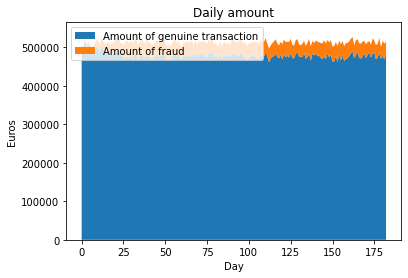

In [154]:
f_types = {
    "Amount of genuine transaction": list(genuine_data),
    "Amount of fraud": list(fraud_data),
}

fig, ax = plt.subplots()
ax.stackplot(days, f_types.values(),
             labels=f_types.keys())
ax.legend(loc='upper left')
ax.set_title("Daily amount")
ax.set_xlabel("Day")
ax.set_ylabel("Euros")

plt.show()

3 - Terminal profile

| Column | Type | Description |
| --- | --- | --- |
| TERMINAL_ID | int64 | The terminal ID|
| (x_terminal_id,y_terminal_id) | float64 | A pair of real coordinates (x_terminal_id,y_terminal_id) in a 100 * 100 grid, that defines the geographical location of the terminal|

The generate_terminal_profiles_table function provides an implementation for generating a table of terminal profiles. It takes as input the number of terminals for which to generate a profile and a random state for reproducibility. It returns a DataFrame containing the properties for each terminal.

In [15]:
terminal_profiles_df.head()

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,41.702200,72.032449
1,1,0.011437,30.233257
2,2,14.675589,9.233859
3,3,18.626021,34.556073
4,4,39.676747,53.881673


In [16]:
terminal_profiles_df.shape

(1000, 3)

In [23]:
#inspiration uniquement
sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig = plt.gcf()

fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x="TX_TIME_DAYS", y="value", data=tx_stats, hue="stat_type", hue_order=["nb_tx_per_day","nb_fraud_per_day","nb_fraudcard_per_day"], legend=False)

sns_plot.set_title('Total transactions, and number of fraudulent transactions \n and number of frauded cards per day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation", ylabel="Number")

sns_plot.set_ylim([0,300])

labels_legend = ["# transactions per day (/50)", "# fraudulent txs per day", "# fraudulent cards per day"]

sns_plot.legend(loc='upper left', labels=labels_legend,bbox_to_anchor=(1.05, 1), fontsize=15)

NameError: name 'tx_stats' is not defined

<Figure size 1080x576 with 0 Axes>